In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Efect of sampling in a Markov model
This is a complement on some discussion about the follow lecture https://youtu.be/34Noy-7bPAo por of the Artificial Intelligence Nano degree from Udacity

![](hmm_representation.png)

Given the above diagram one questions arises:
### How did we get the 0.1, 0.2, 0.05 transition probabilities?
The first approach might be that transitions probability should be inversely proportional to the amount of time in a corresponding state. So $0.1 = \frac{1}{10}$, $0.2 = \frac{1}{5}$ and $0.05 = \frac{1}{20}$.
That seems ok, but another question might arise:
### What is the units were miliseconds, or microseconds, or just some units were 2 seconds correspond to a time unit? How would the model would change? 
Applying the same rules for miliseconds, the results will be: 1e-04, 2e-04,5e-05 respectevely. 
### What does this means?
This can be viewed as how many samples will I be in a specific state. For example, for seconds in the first state, I will sample it 10 times in average, for the second 5 and the third 20. For miliseconds, I will do it 10000, 5000 and 20000 in avarage respectevely

### In the following notebook you can see how the probabilities of each state evolve with time given different sampling rates
*[Skip code and jump to graph](#graph)

In [3]:
def get_state_probabilities(samples_per_second, runing_seconds, transition_vector_list = [0.1, 0.2, 0.05, 0]):
    # Redefine transition vector taking sampling into account
    transition_vector = np.array(transition_vector_list)/samples_per_second
    print('Transition vector:',transition_vector)
    # Transition matrix from transition_vector
    transition_matrix = np.array([[1-transition_vector[0], transition_vector[0], 0, 0],\
                                 [0, 1-transition_vector[1], transition_vector[1], 0], \
                                 [0, 0, 1-transition_vector[2], transition_vector[2]],
                                 [0, 0, 0, 1]])
    print('Transition matrix:')
    print(transition_matrix)
    # We start in state 1 with probability one
    next_state = np.array([1, 0, 0, 0])
    last_state_evol = []
    third_state_evol = []
    second_state_evol = []
    first_state_evol = []
    # Sample the markov model
    for i in range(int(runing_seconds*samples_per_second)):
        next_state = next_state.dot(transition_matrix)
        last_state_evol.append(next_state[3])
        third_state_evol.append(next_state[2])
        second_state_evol.append(next_state[1])
        first_state_evol.append(next_state[0])
        
    print('States probabilities after sampling:',next_state)
    # Return the samples of each state
    return first_state_evol, second_state_evol, third_state_evol, last_state_evol

In [4]:
runing_seconds = 40

In [5]:
samples_per_second = 0.25
states_025 = get_state_probabilities(samples_per_second, runing_seconds)

Transition vector: [ 0.4  0.8  0.2  0. ]
Transition matrix:
[[ 0.6  0.4  0.   0. ]
 [ 0.   0.2  0.8  0. ]
 [ 0.   0.   0.8  0.2]
 [ 0.   0.   0.   1. ]]
States probabilities after sampling: [ 0.00604662  0.00604652  0.26214482  0.72576205]


In [6]:
samples_per_second = 0.5
states_05 = get_state_probabilities(samples_per_second, runing_seconds)

Transition vector: [ 0.2  0.4  0.1  0. ]
Transition matrix:
[[ 0.8  0.2  0.   0. ]
 [ 0.   0.6  0.4  0. ]
 [ 0.   0.   0.9  0.1]
 [ 0.   0.   0.   1. ]]
States probabilities after sampling: [ 0.01152922  0.01149265  0.2781363   0.69884183]


In [7]:
samples_per_second = 1
states_1 = get_state_probabilities(samples_per_second, runing_seconds)

Transition vector: [ 0.1   0.2   0.05  0.  ]
Transition matrix:
[[ 0.9   0.1   0.    0.  ]
 [ 0.    0.8   0.2   0.  ]
 [ 0.    0.    0.95  0.05]
 [ 0.    0.    0.    1.  ]]
States probabilities after sampling: [ 0.01478088  0.01464796  0.28375278  0.68681837]


In [8]:
samples_per_second = 1000
states_1000 = get_state_probabilities(samples_per_second, runing_seconds)

Transition vector: [  1.00000000e-04   2.00000000e-04   5.00000000e-05   0.00000000e+00]
Transition matrix:
[[  9.99900000e-01   1.00000000e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   9.99800000e-01   2.00000000e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   9.99950000e-01   5.00000000e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
States probabilities after sampling: [ 0.01831198  0.01797678  0.28807507  0.67563618]


In [14]:
x_025 = np.linspace(0,runing_seconds, len(states_025[0]))
x_05 = np.linspace(0,runing_seconds, len(states_05[0]))
x_1 = np.linspace(0,runing_seconds, len(states_1[0]))
x_1000 = np.linspace(0,runing_seconds, len(states_1000[0]))

<a id="graph"></a>

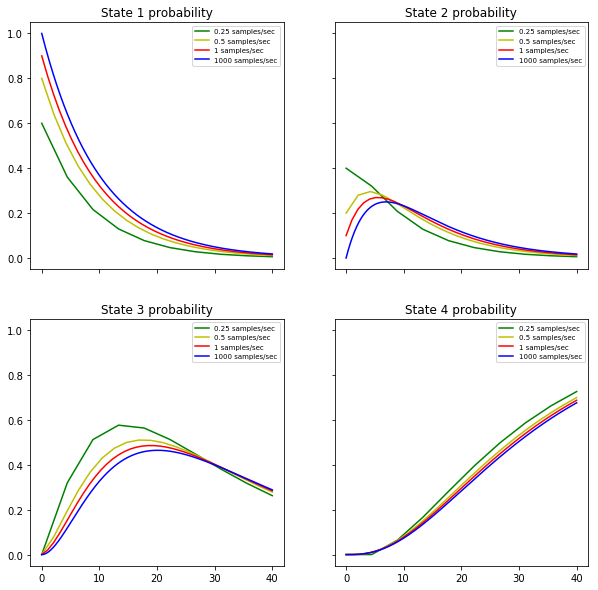

In [15]:
f, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize = (10,10))
ax = ax.flatten()
titles = ['State 1 probability', 'State 2 probability', 'State 3 probability', 'State 4 probability']
for i in range(4):
    ax[i].set_title(titles[i])
    ax[i].plot(x_025, states_025[i],color='g', label = '0.25 samples/sec')
    ax[i].plot(x_05, states_05[i],color='y', label = '0.5 samples/sec')
    ax[i].plot(x_1, states_1[i],color='r', label = '1 samples/sec')
    ax[i].plot(x_1000, states_1000[i],color='b', label = '1000 samples/sec')
    ax[i].legend(fontsize = 'x-small')
plt.show()